<a href="https://colab.research.google.com/github/hafsakhaerunisa/Persiapan-Flip-Class-1-Data-Mining/blob/main/Persiapan_Flip_Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PERSIAPAN FLIP CLASS

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
import calendar, folium
from folium.plugins import HeatMap
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use('bmh'); sns.set()

In [2]:
#menginput data langsung dari file csv melalui url
price=pd.read_csv('https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv')
N, P = price.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(price))
price

baris =  936 , Kolom (jumlah variabel) =  10
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [3]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"
import numpy as np
df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(936,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [4]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(935, 10) (936, 10)


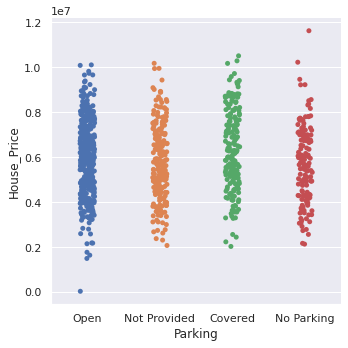

In [5]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

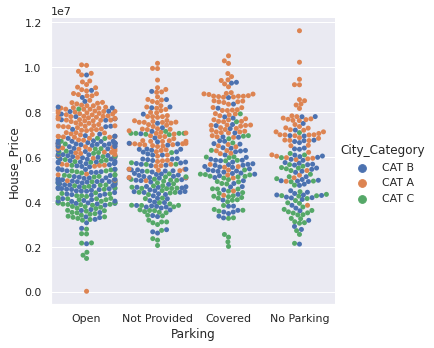

In [6]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

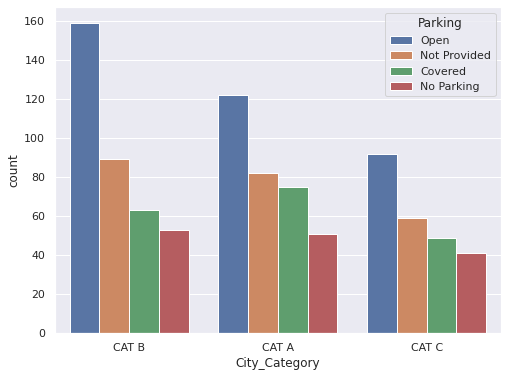

In [7]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="City_Category", hue="Parking", data=price2)

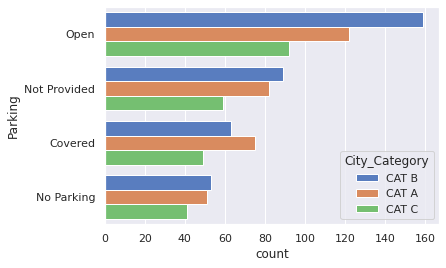

In [8]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)

In [11]:
X = price2[price2["Parking"].isin(["Open","Covered"])]
X = X[X["House_Price"]<7000000]
X.groupby(["Parking", "City_Category"]).size().unstack()

City_Category,CAT A,CAT B,CAT C
Parking,,,
Covered,18,52,47
Open,39,142,91


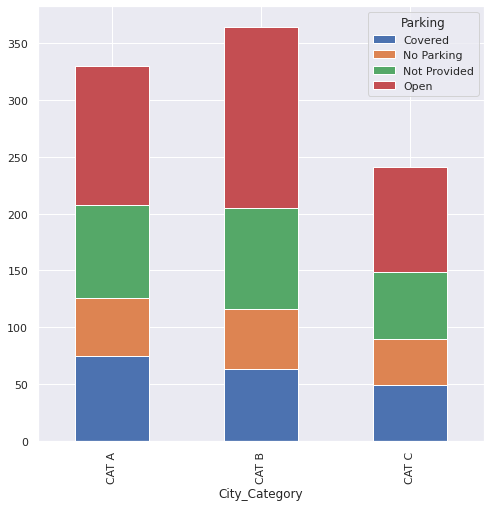

In [12]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

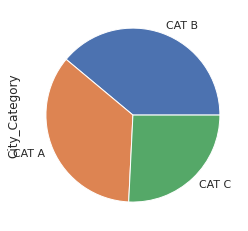

In [13]:
# PieChart
plot = price2.City_Category.value_counts().plot(kind='pie')

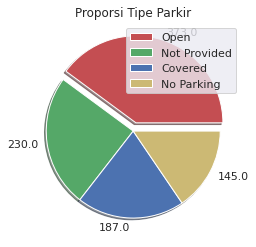

In [14]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.1, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels, loc='best')
plt.show()

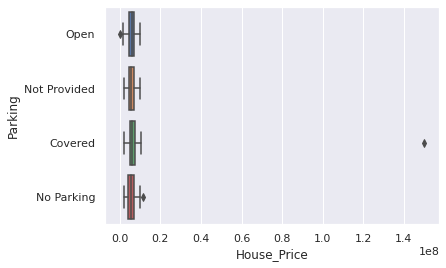

In [15]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

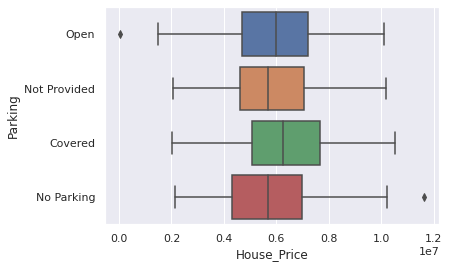

In [16]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

##MENDAPATKAN DATA OUTLIER DARI VISUALISASI YANG TELAH DILAKUKAN

In [17]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range. 
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_ = (price2['House_Price'] < (Q1 - 1.5 *IQR)) # Outlier bawah
rumah_potensial = price2.loc[outliers_]
rumah_potensial

Q1=4660000.0, Q3=7180500.0, IQR=2520500.0


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,812,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


##BOX PLOT YANG DIPISAHKAN BERDASARKAN KATEGORI

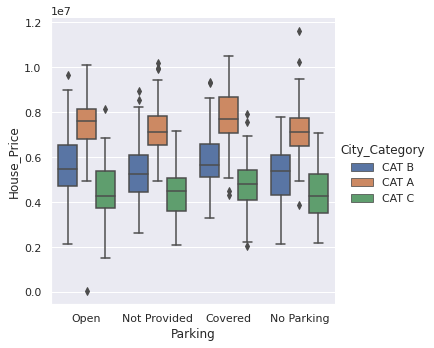

In [18]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

## SWARN PLOT AND VIOLIN PLOT

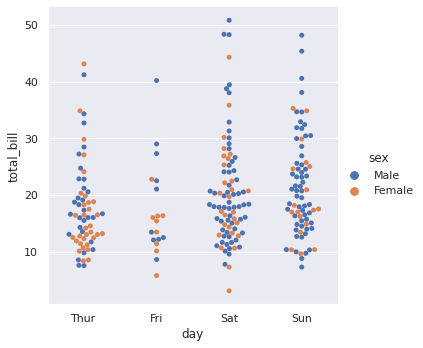

In [19]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

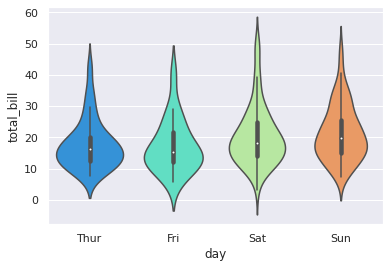

In [20]:
p = sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

##HISTOGRAM

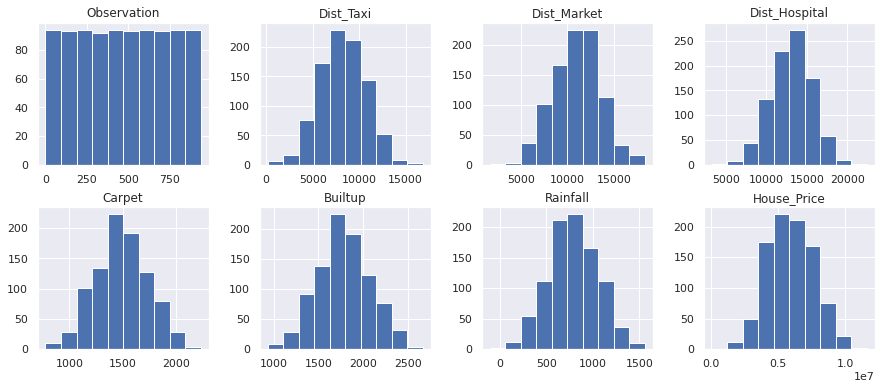

In [21]:
numerical = price2.select_dtypes(include = ['int64','float64']).columns

price2[numerical].hist(figsize=(15, 6), layout=(2, 4));

##CONDITIONAL PLOT

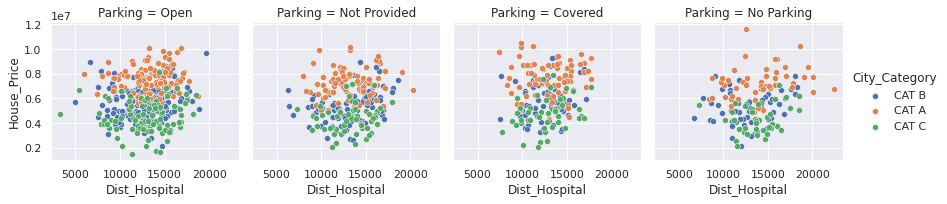

In [22]:
cond_plot = sns.FacetGrid(data=price2, col='Parking', hue='City_Category')#, hue_order=["Yes", "No"]
p = cond_plot.map(sns.scatterplot, 'Dist_Hospital', 'House_Price').add_legend()

##PAIRWISE PLOT

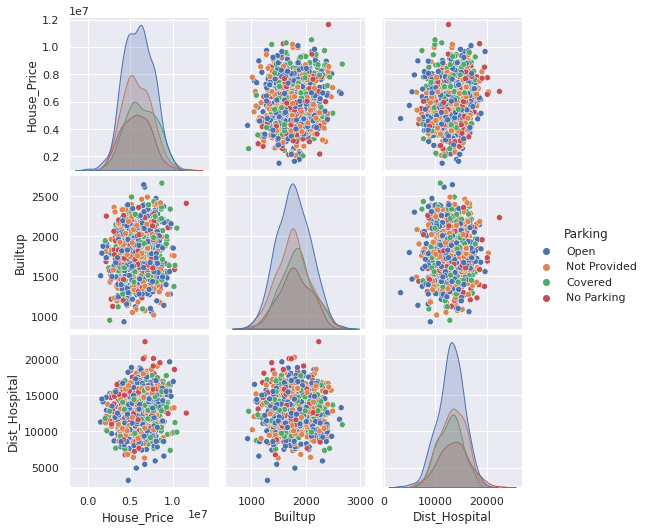

In [23]:
# Coba kita perhatikan sebagiannya saja dulu dan coba kelompokkan berdasarkan "Parking"
p = sns.pairplot(price2[['House_Price','Builtup','Dist_Hospital','Parking']], hue="Parking")
# Ada pola menarik?

##CHECKING CORRELATION

In [24]:
price2.corr()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Observation,1.000000,0.030618,0.008914,0.032196,-0.064274,-0.059131,0.002697,0.064585
Dist_Taxi,0.030618,1.000000,0.452924,0.797675,0.010763,0.006440,0.025642,0.111882
Dist_Market,0.008914,0.452924,1.000000,0.621344,-0.015922,-0.018015,0.082008,0.122612
Dist_Hospital,0.032196,0.797675,0.621344,1.000000,0.011106,0.008524,0.055812,0.132927
Carpet,-0.064274,0.010763,-0.015922,0.011106,1.000000,0.998873,-0.042375,0.101190
Builtup,-0.059131,0.006440,-0.018015,0.008524,0.998873,1.000000,-0.039242,0.093593
Rainfall,0.002697,0.025642,0.082008,0.055812,-0.042375,-0.039242,1.000000,0.016101
House_Price,0.064585,0.111882,0.122612,0.132927,0.101190,0.093593,0.016101,1.000000


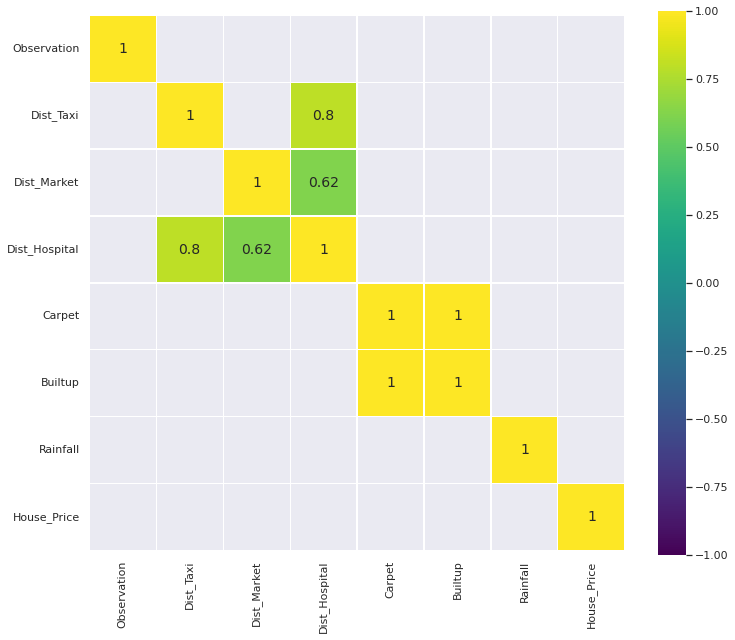

In [25]:
# HeatMap untuk menyelidiki korelasi
corr2 = price2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);